In [67]:
import pandas as pd

In [68]:
data=pd.read_csv(r"C:\Users\ASUS VIVOBOOK\Downloads\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [70]:
data.duplicated().sum()

np.int64(0)

In [71]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: []
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [72]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


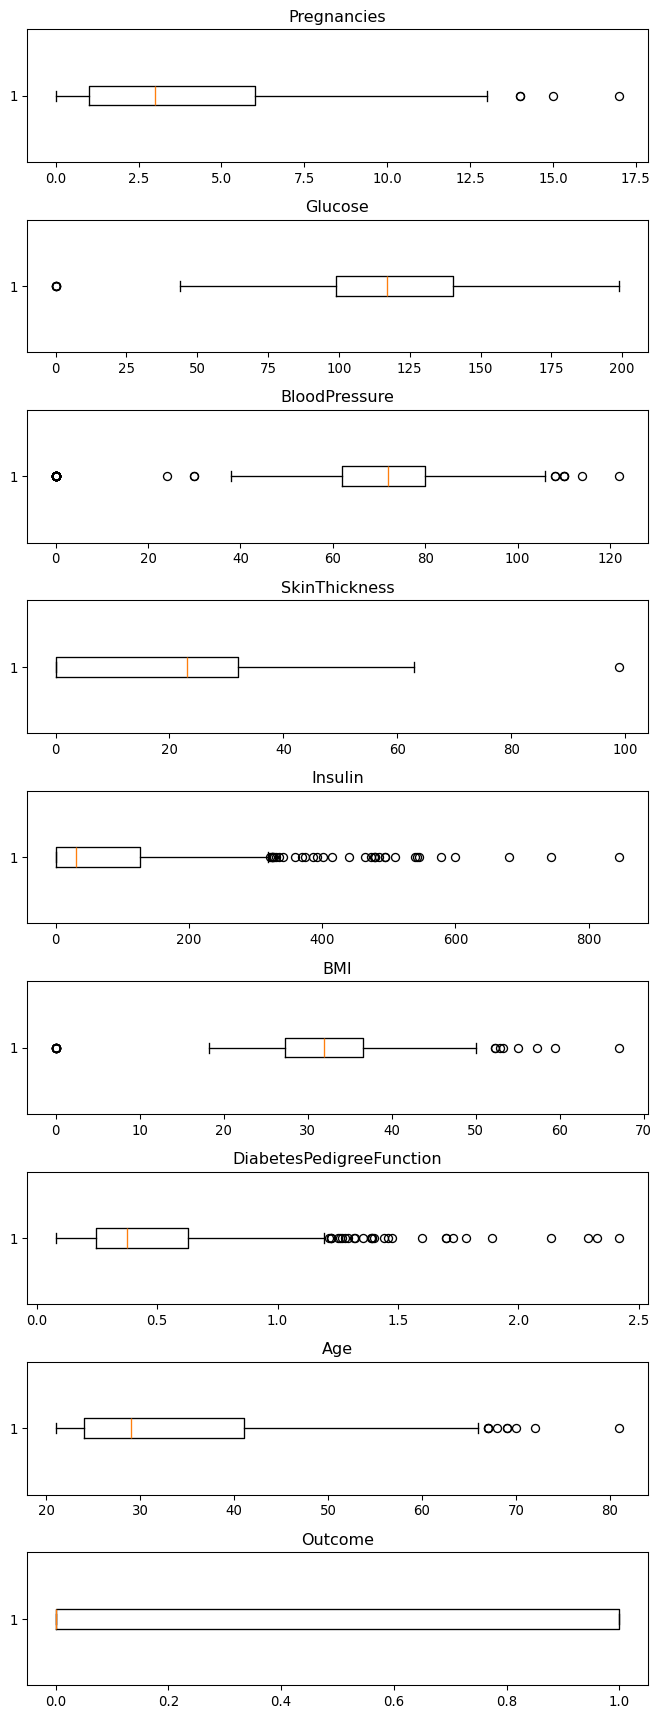

In [73]:
fig, ax = plt.subplots(len(data.columns), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(data.columns):
    ax[i].boxplot(data[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

In [74]:
import numpy as np
for i in num_cols:
    q1, q3 = np.percentile(data[i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


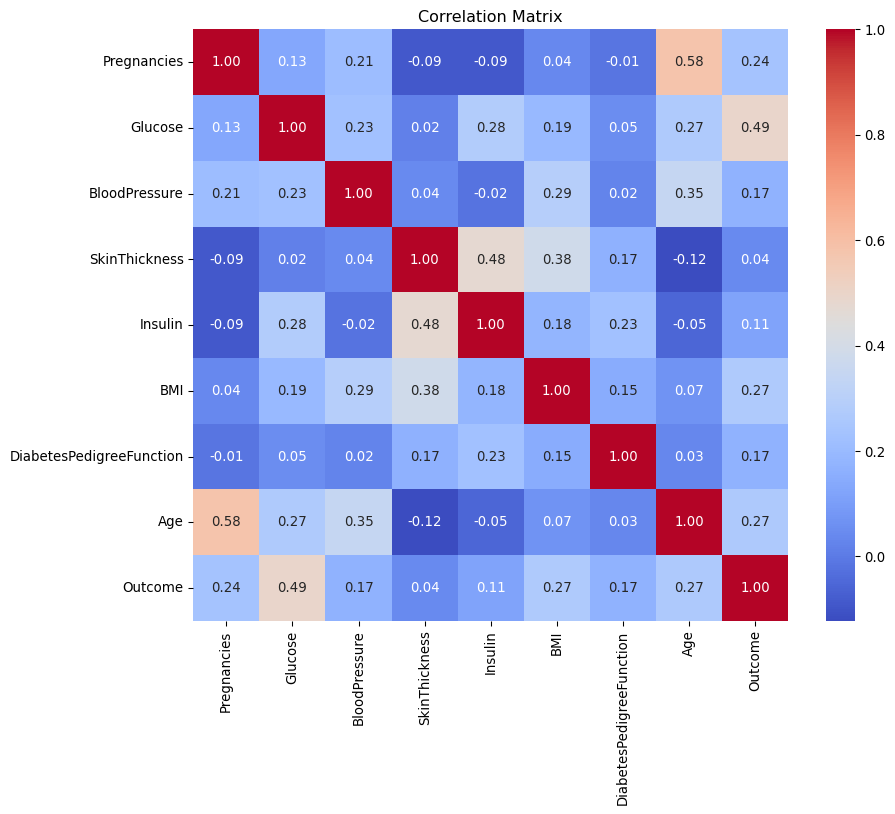

In [75]:
corr = data.corr()
import seaborn as sns

plt.figure(figsize=(10, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

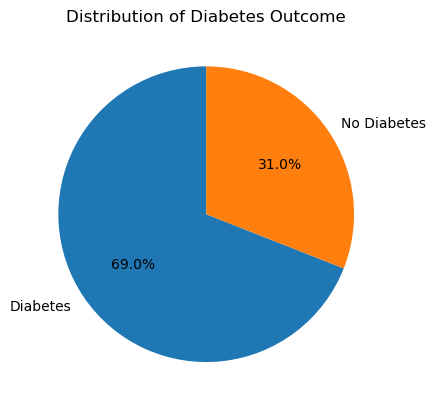

In [76]:
plt.pie(data['Outcome'].value_counts(), labels=['Diabetes', 'No Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcome')
plt.show()